<a href="https://colab.research.google.com/github/RickyMacharm/Tuberculosis/blob/master/Tuberculosis_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Connect colab to your Google drive**

In [0]:
# Since we are using the fastai libraries we may as well import them from the very beginning
from fastai import *
from fastai.vision import *

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'tuberculosis/' #we choose the name 'tuberculosis' as folder name


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# **Connect colab to my Kaggle account**

In [0]:
# Run this cell and select the kaggle.json file downloaded from kaggle.com account settings page.
from google.colab import files
files.upload()

In [0]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
ls: cannot access 'kaggle.json': Transport endpoint is not connected


'-rw-r--r-- 1 root root 67 May 25 14:30 kaggle.json' shows the file is where it should be

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
cp: cannot stat 'kaggle.json': Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
kaggle.json


In [0]:
#this is from the fastai libraries
path = Path(base_dir + 'data/')

path.mkdir(parents=True, exist_ok=True)


In [0]:
# this cell should be used in any order you see fit just to check which directory you are working
!ls

gdrive	sample_data


#**Download the dataset from Kaggle.com**

This part of the code should only be ran when you are running the whole code for the first time. Once the codes have been downloaded from kaggle into your google drive, do not run this code again.

In [0]:
#I want to download the dataset into the 'data' folder created in the last cell
import os
os.chdir(path)

In [0]:
# copy the data url from kaggle and paste here
  !kaggle datasets download -d kmader/pulmonary-chest-xray-abnormalities

100% 4.08G/4.09G [01:47<00:00, 44.1MB/s]
100% 4.09G/4.09G [01:47<00:00, 40.7MB/s]


In [0]:
# from fastai we use this code just see what we have downloaded
path.ls()

[PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/__MACOSX'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/pulmonary-chest-xray-abnormalities.zip'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles')]

since we can see that it is a zip file we can now unzip the contents and also to delete the zip folder afterwards to save space on our colab

In [0]:
#unzip all files
!unzip \*.zip

Archive:  pulmonary-chest-xray-abnormalities.zip
replace ChinaSet_AllFiles.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Montgomery.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n

Archive:  ChinaSet_AllFiles.zip
   creating: ChinaSet_AllFiles/ClinicalReadings/
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0001_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0002_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0003_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0004_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0005_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0006_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0007_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0008_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0009_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR_0010_0.txt  
 extracting: ChinaSet_AllFiles/ClinicalReadings/CHNCXR

In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/__MACOSX'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/pulmonary-chest-xray-abnormalities.zip'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles')]

In [0]:
#Delete archive
!rm '/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles.zip'
!rm '/content/gdrive/My Drive/tuberculosis/data/Montgomery.zip'

path.ls()

rm: cannot remove '/content/gdrive/My Drive/tuberculosis/data/__MACOSX': Is a directory


[PosixPath('/content/gdrive/My Drive/tuberculosis/data/pulmonary-chest-xray-abnormalities.zip'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/__MACOSX')]

In [0]:
(path/'MontgomerySet/CXR_png').ls()

[PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0001_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0002_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0003_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0004_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0005_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0006_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0008_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0011_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0013_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0015_0.png'),
 PosixPath('/content

In [0]:
(path/'ChinaSet_AllFiles/CXR_png').ls()


[PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0004_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0005_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0006_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0328_1.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0007_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0008_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0009_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0329_1.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0330_1.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/C

All we have have done in the last few cells is just to locate where our images are stored. We can see two folders

The next line of code is to check how many images are in both folders

In [0]:
con_1 = (path/'MontgomerySet/CXR_png').ls()
con_2 = (path/'ChinaSet_AllFiles/CXR_png').ls()
print(len(con_1)); print(len(con_2)); 
len(con_1) + len(con_2)

139
663


802

time to merge them into one and to also check that they are intact

In [0]:
files= ImageList.from_folder(path/'ChinaSet_AllFiles/CXR_png').add(ImageList.from_folder(path/'MontgomerySet/CXR_png'))

len(files)

800

In [0]:

fnames_1 = get_image_files(path/'MontgomerySet/CXR_png')
fnames_1[:5]

[PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0001_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0002_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0003_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0004_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/MontgomerySet/CXR_png/MCUCXR_0005_0.png')]

In [0]:
fnames_2 = get_image_files(path/'ChinaSet_AllFiles/CXR_png')
fnames_2[:5]

[PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0004_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0005_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0006_0.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0328_1.png'),
 PosixPath('/content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png/CHNCXR_0007_0.png')]

The 'ImageList' fucntion is from FastAI and it seems like it only pulls out images. The folders have a pdf file each. So I think we are Good to go now.

In [0]:
np.random.seed(3)
pat = r'_(\d{1}).png$'

In [0]:
data_1 = ImageDataBunch.from_name_re(path/'MontgomerySet/CXR_png', fnames_1, pat, ds_tfms=get_transforms(), size=224)
data_1.normalize(imagenet_stats)

data_2 = ImageDataBunch.from_name_re(path/'ChinaSet_AllFiles/CXR_png', fnames_2, pat, ds_tfms=get_transforms(), size=224)
data_2.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (530 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,1,0,0
Path: /content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png;

Valid: LabelList (132 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,1,0,0,0
Path: /content/gdrive/My Drive/tuberculosis/data/ChinaSet_AllFiles/CXR_png;

Test: None

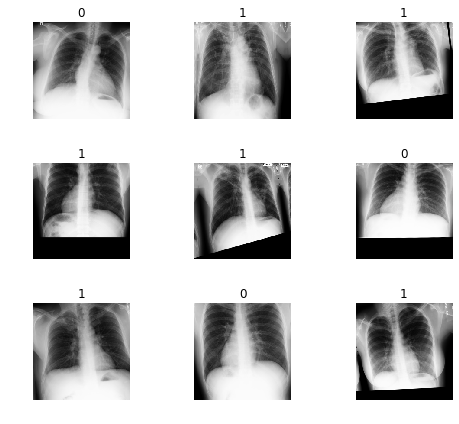

In [0]:
data_1.show_batch(rows=3, figsize=(7,6))

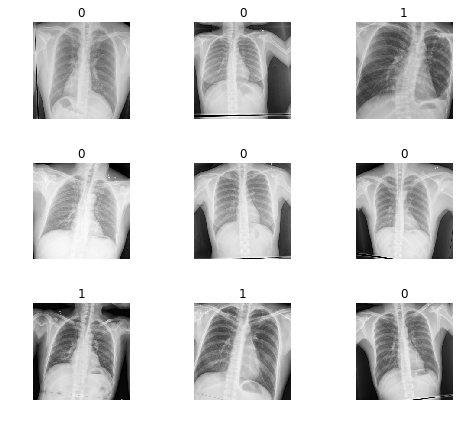

In [0]:
data_2.show_batch(rows=3, figsize=(7,6))

In [0]:
path_img= ImageList.from_folder(path/'ChinaSet_AllFiles/CXR_png').add(ImageList.from_folder(path/'MontgomerySet/CXR_png'))



In [0]:
data = data_1.add(data_2)

In [0]:
fnames